In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [22]:
female = pd.read_csv('Datasets/female_literacy_fertility.csv')
female.head(1)

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"


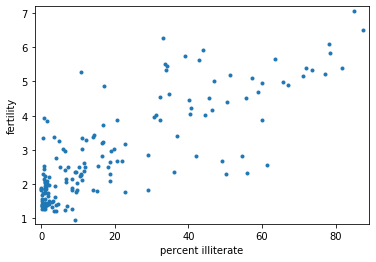

In [23]:
fertility = female.fertility
illiteracy = 100 - female['female literacy'] 
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

<b>You can see the correlation between illiteracy and fertility by eye. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.</b>

In [24]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [25]:
# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

0.8041324026815345


<b>By the substantial Pearson correlation coefficient of 0.8.

## 1) Linear regression
We will assume that fertility is a linear function of the female illiteracy rate. That is, <b>f=ai+b</b>, where a is <b>the slope</b> and b is <b>the intercept</b>. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two.

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


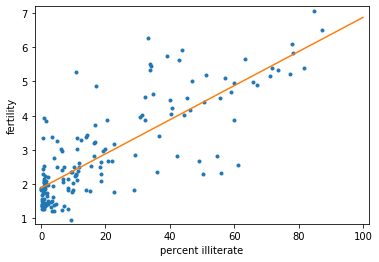

In [26]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

## 2) How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. <b>Where is it minimal?

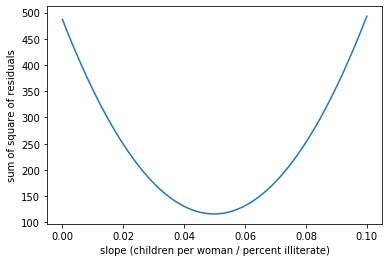

The minimum value of rss (sum of the square of the residuals) on the plot:  [99]
a (slope) in the min rss : 0.04974874371859297
This a (slope) is the same value you got slope when performing the regression.


In [27]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
# The empty_like() function returns a new array with the same shape and type as a given array (in this case, a_vals)
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
# The variable b you computed in the last exercise
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - (a*illiteracy + b))**2)

# Plot the RSS
plt.plot(a_vals, rss , '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

i, = np.where(np.isclose(rss, min(rss)))
print('The minimum value of rss (sum of the square of the residuals) on the plot: ', i)
print('a (slope) in the min rss :', a_vals[i[0]])
print('This a (slope) is the same value you got slope when performing the regression.')

<b>Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

In [28]:
x1= [10.,  8, 13,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]; x2= [10.,  8., 13,  9, 11., 14.,  6.,  4., 12.,  7.,  5.]; x3= [10.,  8., 13,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]
x4= [ 8.,  8.,  8,  8.,  8.,  8.,  8.,19.,  8.,  8.,  8.]; y1= [ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,  4.82,  5.68]
y2= [9.14, 8.14, 8.74, 8.77, 9.26, 8.1,  6.13, 3.1,  9.13, 7.26, 4.74]; y3= [ 7.46, 6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,  6.42,  5.73]
y4= [ 6.58,  5.76,  7.71,  8.84,  8.47 , 7.04,  5.25, 12.5,   5.56 , 7.91 , 6.89]

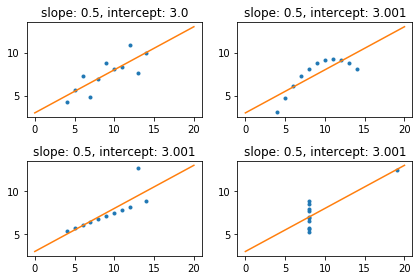

In [29]:
plt.subplot(2, 2, 1)
plt.plot(x1, y1, marker='.', linestyle='none')
a, b = np.polyfit(x1, y1, 1)
c = np.array([0, 20])
d = a * c + b
plt.plot(c, d)
plt.title('slope: '+ str(round(a, 3)) + ', intercept: '+ str(round(b, 3)))

plt.subplot(2, 2, 2)
plt.plot(x2, y2, marker='.', linestyle='none')
a, b = np.polyfit(x2, y2, 1)
c = np.array([0, 20])
d = a * c + b
plt.plot(c, d)
plt.title('slope: '+ str(round(a, 3)) + ', intercept: '+ str(round(b, 3)))

plt.subplot(2, 2, 3)
plt.plot(x3, y3, marker='.', linestyle='none')
a, b = np.polyfit(x2, y2, 1)
c = np.array([0, 20])
d = a * c + b
plt.plot(c, d)
plt.title('slope: '+ str(round(a, 3)) + ', intercept: '+ str(round(b, 3)))

plt.subplot(2, 2, 4)
plt.plot(x4, y4, marker='.', linestyle='none')
a, b = np.polyfit(x2, y2, 1)
c = np.array([0, 20])
d = a * c + b
plt.plot(c, d)
plt.title('slope: '+ str(round(a, 3)) + ', intercept: '+ str(round(b, 3)))

plt.tight_layout()
plt.show()

<b>They all have the same slope and intercept.

## 3) Bootstrap samples
<b>A bootstrap sample</b> is an array of length n that was drawn from the original data with replacement.
<br><b>A bootstrap replicate</b> is a single value of a statistic computed from a bootstrap sample.

In [30]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

   yyyy  mm tmax tmin af   rain  sun
0  1883   1  6.3  1.7  6  122.1  ---


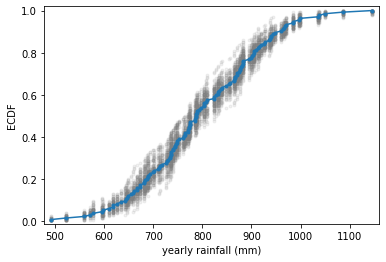

In [31]:
sheffield = pd.read_csv('Datasets/sheffield_weather_station.csv', delimiter='\s+', comment='#')
print(sheffield.head(1))

# annual rainfall 
rainfall = sheffield.groupby('yyyy')['rain'].sum()

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.

## 4) Generating many bootstrap replicates

In [32]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

<b>bootstrap_replicate_1d</b> function computes a replicate. <b>draw_bs_reps()</b> function generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

You will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. You will plot the PDF as a histogram, and you will see that it is Normal. <b>The standard deviation of this distribution</b>, called <b>the standard error of the mean, or SEM</b>. 
<br>sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

10.635458130769607
10.574538005327152


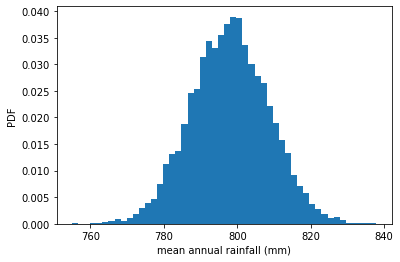

In [33]:
# Compute and print SEM - using hacker statistics
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

<b>What is the 95% confidence interval?

In [34]:
print(np.percentile(bs_replicates, [2.5, 97.5]))

[777.74266791 818.77059701]


You'll generate bootstrap replicates for <b>the variance of the annual rainfall </b>at the Sheffield Weather Station and plot the histogram of the replicates.

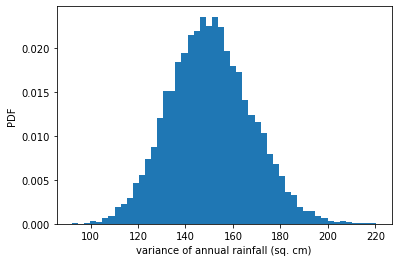

In [35]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## 5) A function to do pairs bootstrap
Pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit().

In [37]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[0.04391308 0.05567307]


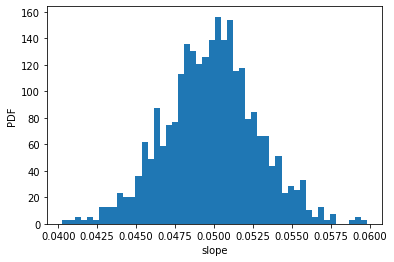

In [39]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))
# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

<b>Plotting bootstrap regressions</b>

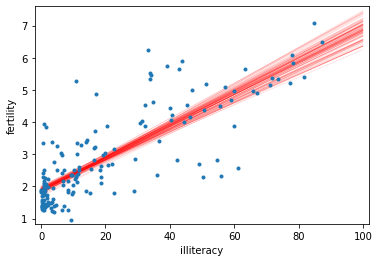

In [40]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Hypothesis Testing

## 6) Permutation Sample

In [41]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). 
<br>We expect these might be differently distributed as hypothesis, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

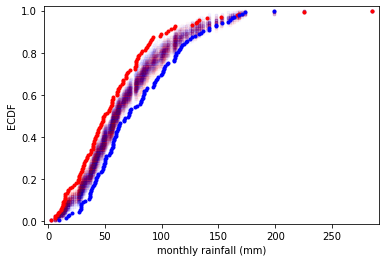

In [44]:
rain_june = sheffield[sheffield['mm']==6].rain
rain_november = sheffield[sheffield['mm']==11].rain

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

## 7) What is a p-value?
The p-value is generally a measure of: the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

In [45]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

         date ID  trial number  impact force (mN)  impact time (ms)  \
0  2013_02_26  I             3               1205                46   

   impact force / body weight  adhesive force (mN)  \
0                        1.95                 -785   

   time frog pulls on target (ms)  adhesive force / body weight  \
0                             884                          1.27   

   adhesive impulse (N-s)  total contact area (mm2)  \
0                   -0.29                       387   

   contact area without mucus (mm2)  \
0                                70   

   contact area with mucus / contact area without mucus  \
0                                               0.82      

   contact pressure (Pa)  adhesive strength (Pa)  
0                   3117                   -2030  


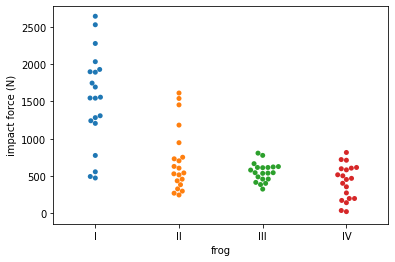

In [50]:
df = pd.read_csv('Datasets/frog_tongue.csv', comment='#')
print(df.head(1))

# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact force (mN)', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

You will compute the probability of getting at least a 0.80 difference in mean <b>impact force / body weight</b> under the hypothesis that the distributions of strike forces for the two frogs are identical.

In [56]:
force_a = df[df.ID=='I']['impact force / body weight']
force_b = df[df.ID=='II']['impact force / body weight']

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)
print(empirical_diff_means)

p-value = 0.008
0.8075000000000001


The p-value tells you that there is about a 0.76% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.0076 and p = 0.0000000076 are both said to be "statistically significant," but they are definitely not the same!

## 8)A/B testing
<b>The vote for the Civil Rights Act in 1964</b>
<br>The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. <b>Did party affiliation make a difference in the vote?</b>
<br>
<br>You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244.
<br>To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [57]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

#### What is equivalent?
<br>Which of the following situations involving testing by a web-based company has an <b>equivalent</b> set up for an A/B test as the one you just did with the Civil Rights Act of 1964?
<br>
<br><b>Solution: </b>You measure the number of people who click on an ad on your company's website before and after changing its color.
<br>
<br><b>Not: </b>The "Democrats" are those who view the ad before the color change, and the "Republicans" are those who view it after.

## Bee Sperm
<b>Do neonicotinoid insecticides have unintended consequences?</b>
<br>You will investigate the effects of neonicotinoid insecticides on bee reproduction. 
<br>You will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

   Specimen Treatment Environment  TreatmentNCSS Sample ID  Colony  Cage  \
0       227   Control        Cage              1    C2-1-1       2     1   

   Sample  Sperm Volume per 500 ul  Quantity  ViabilityRaw (%)    Quality  \
0       1                  2150000   2150000  96.7263814616756  96.726381   

   Age (d)  Infertil  AliveSperm  Quantity Millions  Alive Sperm Millions  \
0       14         0     2079617               2.15              2.079617   

   Dead Sperm Millions  
0             0.070383  


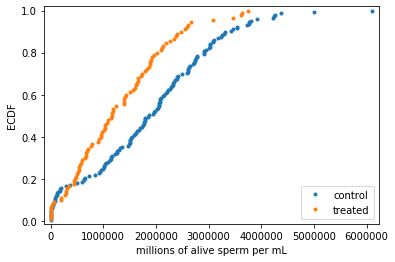

In [60]:
bee = pd.read_csv('Datasets/bee_sperm.csv', comment='#')
print(bee.head(1))
control = bee[bee.Treatment=='Control'].AliveSperm
treated = bee[bee.Treatment=='Pesticide'].AliveSperm

# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm. Let's now do a hypothesis test in the next exercise.

<b>Bootstrap hypothesis test on bee sperm counts

In [62]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0001


The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed. In fact, when I did the calculation with 10 million replicates, I got a p-value of 2e-05.